# Predicting Automobile Prices

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile). Our aim is to predict the automobile's price as accurately as possible with the help of __K-Nearest Neighbors__ learing algorithm and the given data.

### Introduction to the Data set

In [1]:
import pandas as pd
import numpy as np

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Attribute Information:

1. __symboling__: -3, -2, -1, 0, 1, 2, 3.
2. __normalized-losses__: continuous from 65 to 256.
3. __make__:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. __fuel-type__: diesel, gas.
5. __aspiration__: std, turbo.
6. __num-of-doors__: four, two.
7. __body-style__: hardtop, wagon, sedan, hatchback, convertible.
8. __drive-wheels__: 4wd, fwd, rwd.
9. __engine-location__: front, rear.
10. __wheel-base__: continuous from 86.6 120.9.
11. __length__: continuous from 141.1 to 208.1.
12. __width__: continuous from 60.3 to 72.3.
13. __height__: continuous from 47.8 to 59.8.
14. __curb-weight__: continuous from 1488 to 4066.
15. __engine-type__: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. __num-of-cylinders__: eight, five, four, six, three, twelve, two.
17. __engine-size__: continuous from 61 to 326.
18. __fuel-system__: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. __bore__: continuous from 2.54 to 3.94.
20. __stroke__: continuous from 2.07 to 4.17.
21. __compression-ratio__: continuous from 7 to 23.
22. __horsepower__: continuous from 48 to 288.
23. __peak-rpm__: continuous from 4150 to 6600.
24. __city-mpg__: continuous from 13 to 49.
25. __highway-mpg__: continuous from 16 to 54.
26. __price__: continuous from 5118 to 45400.

## Data Cleaning

We noticed that the `normalized-losses` column contains missing values represented using `'?'`. Let's replace these values.

In [2]:
cars.replace('?', np.nan, inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

On comparing attribute information given with the dataset and column information, we find that the columns namely `horsepower`, `peak-rpm` and `price` have `object` dtype but store numerical values. Let's convert these columns to `float64` dtype. 

In [3]:
to_convert = ['peak-rpm', 'horsepower', 'price']
cars[to_convert] = cars[to_convert].astype(float)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
cars.drop(cars.select_dtypes(['object']).columns, axis=1, inplace=True)
cars.drop(columns=['symboling', 'compression-rate'], inplace=True)

### Handling Missing Values

In [5]:
cars.isnull().sum()

wheel-base     0
length         0
width          0
height         0
curb-weight    0
engine-size    0
horsepower     2
peak-rpm       2
city-mpg       0
highway-mpg    0
price          4
dtype: int64

Let's remove all the missing values as there are few. Removing them will not significantly affect our final analysis. 

In [6]:
cars.dropna(axis=0, inplace=True)

### Normalization

To prevent any single column from having too much of an impact on the euclidean distance, we normalize all of the columns to have a mean of 0 and a standard deviation of 1 (Standard Normal Distribution).

In [7]:
normalized_features = (cars - cars.mean())/(cars.std())
normalized_features['price'] = cars['price']

Let's have a final look at the our dataset.

In [8]:
normalized_features

,wheel-base,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-1.678607,-0.432533,-0.844346,-2.033429,-0.015447,0.076064,0.202456,-0.244709,-0.651134,-0.537771,13495.0
1,-1.678607,-0.432533,-0.844346,-2.033429,-0.015447,0.076064,0.202456,-0.244709,-0.651134,-0.537771,16500.0
2,-0.709939,-0.238545,-0.181152,-0.562263,0.513546,0.602973,1.347479,-0.244709,-0.961124,-0.683769,16500.0
3,0.160221,0.197928,0.150445,0.214186,-0.421329,-0.426895,-0.037200,0.795827,-0.186150,-0.099778,13950.0
4,0.094548,0.197928,0.245187,0.214186,0.515470,0.219766,0.308970,0.795827,-1.116119,-1.267761,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,1.687104,1.184033,1.429462,0.704574,0.761692,0.339518,0.282342,0.587720,-0.341145,-0.391773,16845.0
201,1.687104,1.184033,1.382091,0.704574,0.948282,0.339518,1.507250,0.379612,-0.961124,-0.829767,19045.0
202,1.687104,1.184033,1.429462,0.704574,0.877109,1.105931,0.814910,0.795827,-1.116119,-1.121763,21485.0
203,1.687104,1.184033,1.429462,0.704574,1.271449,0.435320,0.069314,-0.660923,0.123840,-0.537771,22470.0


## Univariate K-Nearest Neighbors

In [9]:
np.random.seed(1)
row_index = normalized_features.index.values
normalized_features = normalized_features.loc[np.random.permutation(row_index)]

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

def knn_train_test(target_col, feature_col, k):
    # Cross Validation Strategy
    kf = KFold(5, shuffle=True, random_state=1)
    # Machine Learning Model
    model = KNeighborsRegressor(n_neighbors=k)
    # Performance Evaluation
    mses = cross_val_score(model, feature_col, target_col, scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    
    return avg_rmse

# Comparing features

rmse_values = dict()
k_values = [3, 5, 7, 9]
target_var = normalized_features['price']

for feature in normalized_features.columns[:-1]:
    rmse_values[feature] = list()
    for k in k_values:
        rmse_k = knn_train_test(target_var, normalized_features[[feature]], k)
        rmse_values[feature].append(rmse_k)

rmse_val = pd.DataFrame.from_dict(rmse_values, orient='index')
rmse_val.rename(columns={0:3, 1:5, 2:7, 3:9}, inplace=True)
rmse_val

,3,5,7,9
wheel-base,5099.007370,5766.337613,5844.374800,5812.047661
length,5138.224811,5319.747764,5523.549510,5410.156671
width,4159.512138,4458.857209,4446.456625,4320.641259
height,8036.416845,7967.708448,7858.794066,7635.966338
curb-weight,4422.703306,4318.411220,4201.775078,4081.108334
engine-size,3044.930332,3216.416754,3454.702137,3496.641216
horsepower,3490.796987,3842.446154,4023.842778,4305.442599
peak-rpm,7360.981090,7570.086792,7882.052336,7706.616810
city-mpg,4578.235709,4324.956625,4455.999712,4509.680421
highway-mpg,4099.710074,4287.291266,4334.566647,4349.921322


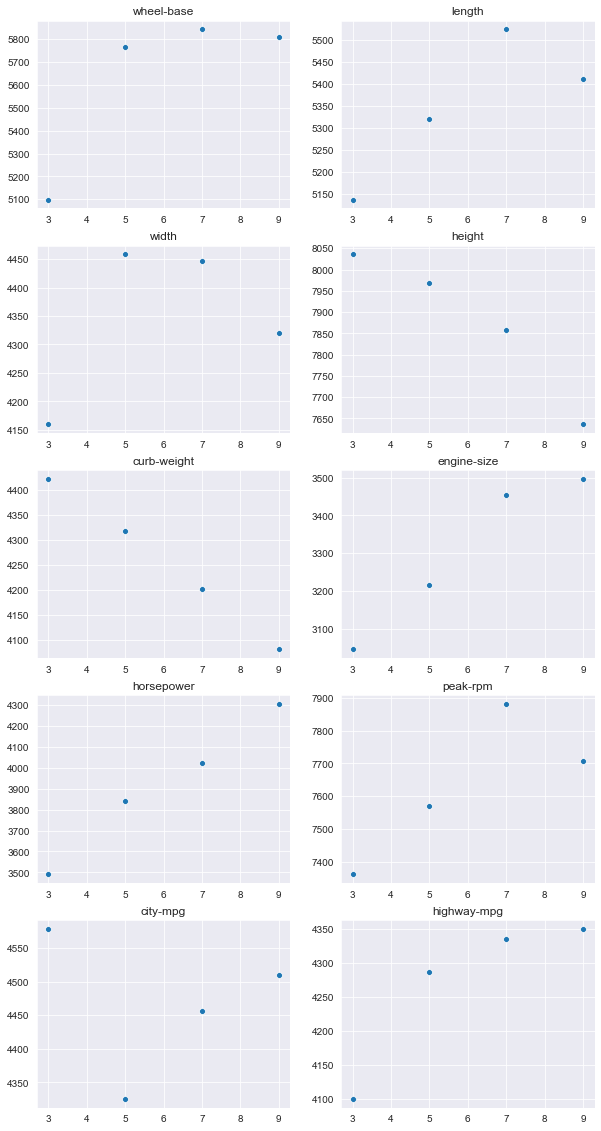

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
for i in range(len(rmse_val)):
    sns.scatterplot(x=k_values, y=rmse_val.iloc[i], ax=axes[i//2, i%2], )
    axes[i//2, i%2].set_title(rmse_val.index[i])
    axes[i//2, i%2].set_ylabel(None)

The 6 best features (in order of their RMSE value at k=5):-
- `engine-size`
- `horsepower`
- `highway-mpg`
- `curb-weight`
- `city_mpg`
- `width`

## Multivariate KNN

In [12]:
best_ft = ['engine-size', 'horsepower', 'highway-mpg', 'curb-weight', 'city-mpg', 'width']

for r in range(2, len(best_ft)+1):
    best_r = best_ft[:r]
    rmse_r = knn_train_test(target_var, normalized_features[best_r], 5)
    print('RMSE {} best features:'.format(r), rmse_r)

RMSE 2 best features: 3122.585942466869
RMSE 3 best features: 3105.639650142014
RMSE 4 best features: 3211.5582696267643
RMSE 5 best features: 3230.9339683612034
RMSE 6 best features: 3291.959557681132


## Hyperparameter Optimization

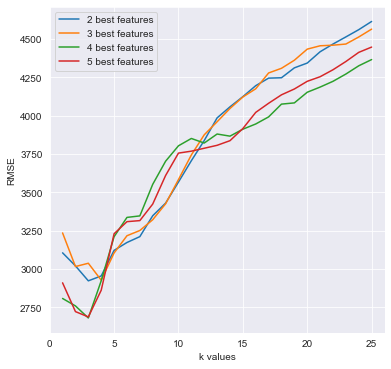

In [13]:
top_perf = [2, 3, 4, 5]
rmse_dist = dict()

for t in top_perf:
    top_ft = best_ft[:t]
    rmse_dist[t] = list()
    for j in range(1, 26):
        rmse_j = knn_train_test(target_var, normalized_features[top_ft], j)
        rmse_dist[t].append(rmse_j)
        
rmse_dist_df = pd.DataFrame.from_dict(rmse_dist, orient='index')

# Plotting the results
f= plt.figure(figsize=(6, 6))
for i in range(len(rmse_dist_df)):
    sns.lineplot(x=range(1,26), y=rmse_dist_df.iloc[i], label='{} best features'.format(rmse_dist_df.index[i]))

plt.xlim(0, 26)
plt.xlabel('k values')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Conclusion

We chose to use the 5 features:-
- `engine-size`
- `horsepower`
- `highway-mpg`
- `curb-weight`
- `city-mpg`  

for predicting our automobile's price with the machine learning algorithm __K Nearest Neighbors__ with the k value __3__ to obtain the best estimate.